# Overfitting Problem & Try to Figure Way Out 

### Created by @JunLuo and @YankunQiu
#### 22 Jan 2018 - 1 Feb 2018

## Purpose of this document

This document mainly focuses on the work done from 22 Jan 2018 to 1 Feb 2018. It shows the problem we encountered recently, and how we tried to find the way out.

The document will be presented with 5 sections:

1. The problem with the previous algorithm

2. The method we tried to fix the problem

3. The new method from another perspective

4. Next steps

5. References

# 1. The problem with the previous algorithm

### 1.1 The result running the previous algorithm

![](http://preview.ibb.co/jUWCUR/Screenshot_2018_02_02_02_00_52.png)

![](http://image.ibb.co/jDEub6/Screenshot_2018_02_02_02_03_06.png)

### 1.2  Test the model on other datasets

A paper is researched: Human activity recognition using multisensor data fusion based on reservoir computing(Palumbo, F., Gallicchio, C., Pucci, R., & Micheli, A. 2016)

Luckily, we could able to access to the data they are using. The data format of theirs is similar to ours(although they are using 3 accelerometer sensors). The data they are using is like this:

![](https://image.ibb.co/itdWM6/ARe_M_data_sample.png)

They use the magnitude of x,y,z acceleration data using this formular:
![](https://image.ibb.co/kT8CuR/magnitude.png)


And the result of using their training and testing procedure is shown as the screenshot below...
![](https://image.ibb.co/bGbwom/ARe_M_Result.png)

Seems that the result is pretty close to their experiment using other algorithms.

It shows that our algorithm has the ability to deal with this kind of classification problem. However, how good or bad it performs is affect by other factors which we have not found yet, but mainly from the data itself. 
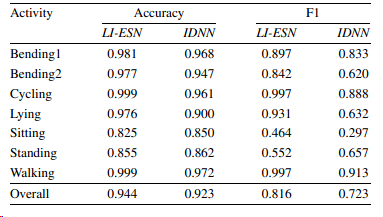

# 2. Analyze the reason of overfitting & attempts to solve

## 2.1 Attempts to solve

#### (1) Less features?

X, X_mean, X_var

Underfitting...

#### (2) Less Branches in the tree?

Still not good

#### (3) Less Depth in the trees?

Already applied depth of 5

#### (4) More samples per leaf

e.g. if a leaf node has less than 50 data points, then chose the majority class of these data points as the decision.

Result: can solve a bit of the overfitting problem, but still cannot solve the main problem.


## 2.2 Only use X, Y, Z acceleration as features ------------------ Underfitting

Only using X, Y, Z acceleration as features results in underfitting


X vs Z
![](https://image.ibb.co/hOncuR/xz.png)


X vs Y
![](https://image.ibb.co/hd1Rom/xy.png)

Y vs Z
![](https://image.ibb.co/eybRom/yz.png)

## 2.2 Use raw data, mean, variance as features ------------------ Overfitting

In order to better understand the training data, several 3D graphs are generated to visualize the relationship between each group of features.

Only use x,y,z acceleration to classify is hard... Here's a graph showing why.

![](https://image.ibb.co/d6qxuR/acceleration_XYZ.gif)

Only use the mean_x, mean_y, mean_z value of a window of data points to classify is TOOOOOOOOOOO EASY...

![](https://image.ibb.co/b04e8m/meanXYZ.png)

Only use the variance_x, variance_y, variance_z value of a window of data points is like this...
![](https://image.ibb.co/iPj1M6/varXYZ.gif)


#### To sum up, a classifier can use only the mean of the data to classify because it is the easiest way. However, in another file, these values are totally different, which make the prediction performance bad.

We can visualize a tree in our Random Forest to confirm this conclusion:
![](https://image.ibb.co/iOmtjR/Random_Forest_Tree.png)

Zoom in to the branches of tree. Almost all the decision points are made by the MEAN values and VARIANCE.


### What does these indicates?

1. The features are not offering enough information! 
2. If a new file is coming, it will be classified to the nearest training class.
3. Adding new features to these such as process data, have very little impact on the classification result.
4. The problem of the result is more related to the DATA(features), less to the Result.


#### Some other thoughts
1. A method cannot be suitable for every problem. E.g. Stock prediction, the mean and standard deriviation are effective!
2. There should be some effective features exists, or we can still use these features but with some small transformation to the data.
3. Learn from mistake: This can be a mistake because we haven't find this problem earlier. Next time we would know to visulize the data to get intuitive understandings of whether the features are good or not.

# 3. The new method from another perspective

### 3.1 Research & Analysis

As discussed in the previous section, the graphs give us some ideas about why our previous algorithm doesn't work as we expected. Inspired by the work being done in LanceSense project, we think it may be more intuitive to classify all the files according to the path of the lance movement. Also, when watching the videos we are given, there may be some patterns behind the movement of lance with normal tips. And with a damaged tip, the movement of the lance maybe more unpredictable. 

![](http://image.ibb.co/eB2gom/lancesense_home.png)

As we have never tried to predict on the quaternion, and to simplify the calculations, we predict the label on the position from quaternion. All the process of computations is based on the page on confluence (https://confluence.myoutotec.com/display/AUS/Measuring+lance+motion). Here are some examples of the lance movement trace.

![](http://image.ibb.co/i8HSDm/4h_json7.png)

![](http://image.ibb.co/huD0Ym/4h_json3.png)

![](http://image.ibb.co/i7pUR6/4h_json619.png)

![](http://image.ibb.co/k46XeR/4h_json496.png)

We plot a picture using every 20 data points. We find that, with a normal tip, a large number of pictures we got would look like the first two. Otherwise, there should be no obvious pattern.

### 3.2 Model adopted

This is the structure of a pre-defined model, whose name is VGG-16.

![](https://www.cs.toronto.edu/~frossard/post/vgg16/vgg16.png)

The model in the first stage is based on this. As we are not sure if our computing power is enough to handle this, we reduced the number of layers of our model. Generally, we have 8 convolutional layers, 4 max pooling layers and 3 fully connected layer, which follows the structure below.

![](http://image.ibb.co/mv7BpR/Screenshot_2018_02_02_01_45_34.png)

### 3.3 Evalution

About 60% accuracy on new data file

### 3.4 Potential improvements

More layers!

Voting!

Using a series of pictures as input, instead of only one

# 4. Next steps

1. Never give up! Keep on trying!
2. A lot of parameters to be tuned to generate the trace pictures: size, window, smooth
3. Adjust the Deep Neural Network parameters(but not likely to adjust much because we already have a very good one...)
4. Better features, features, features...for non-deep-learning methods
5. Try RNN, LSTM.(already talked about them for many times but still not tried yet...)

# 5. References

[1] Palumbo, F., Gallicchio, C., Pucci, R., & Micheli, A. (2016). Human activity recognition using multisensor data fusion based on reservoir computing. Journal of Ambient Intelligence and Smart Environments, 8(2), 87-107.

[2] Simonyan, K., & Zisserman, A. (2014). Very deep convolutional networks for large-scale image recognition. arXiv preprint arXiv:1409.1556.